# K-means Clustering

K-means clustering is a popular method for dividing a collection of observations of multiple variables $\boldsymbol{X}_i$ into $k$ clusters. It is important to know, that the number of clusters has to be chosen by the user and that, originally, only metric variables should be used for the k-means algorithm. If your dataset contains categorical variables as well, you should search for further development of k-means, e.g., k-metroids or k-modes.

## How it works

If you recall the methods discussed in the supervised learning section, you notice that each model is estimated by optimizing an objective function. Typically, the function is defined as a loss function which is minimized. The smaller the loss function, the more estimated targets correspond to actual target observations. But for unsupervised, we do not have any targets, so what should we do? When are we satisfied with a certain partition?

The aim for a well working clustering algorithm is to divide the dataset in different clusters such that observations within a cluster are more similar to each other than to observations from another cluster. How do we measure similarity?

For k-means clustering, similarity between two observations $\boldsymbol{x_i}$, $\boldsymbol{x_j}$ is typically measured by their distance and quantified with Euclidean distance is used:

$$
d\left( \boldsymbol{x_i}, \boldsymbol{x_{j}} \right) = \sum_{q = 1}^{n} (x_{iq} - x_{jq})^2 = || \boldsymbol{x_i} - \boldsymbol{x_{j}} ||_2^2 
$$

with 

$$
\boldsymbol{x_i} =  (x_{i1}, ... , x_{in})^T,  \boldsymbol{x_j} =  (x_{j1}, ... , x_{jn})^T~~~ i,j = 1, ..., m
$$

Let us take a look at a small example, imagine we have two features $X_1, X_2$ and three observations:

<table>
    <tr> 
        <th> $X_1$ <th/>
        <th> $X_2$ <th/>
    <tr/>
    <tr>
        <td> $0.5$ <td/>
        <td> $2$   <td/>
    <tr/>
    <tr>
        <td> $1$   <td/>
        <td> $1$   <td/>
    <tr/>
    <tr>
        <td> $2$   <td/>
        <td> $5$   <td/>
    <tr/>
<table/>

$d\left( \boldsymbol{x}_1, \boldsymbol{x}_2\right) = (0.5 - 1)^2 + (2 - 1)^2 = 1.25$

$d\left( \boldsymbol{x}_1, \boldsymbol{x}_3\right) = (0.5 - 2)^2 + (2 - 5)^2 = 11.25$

$d\left( \boldsymbol{x}_2, \boldsymbol{x}_3\right) = (1 - 2)^2 + (1 - 5)^2 = 17$

If we illustrate this in two dimensional space, the following figure results. You can see that points with lower distance are closer to each other graphically.

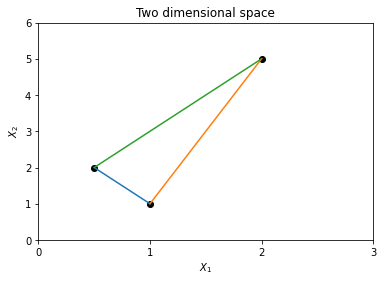

In [21]:
import matplotlib.pylab as plt

x_1 = [1, 2, 0.5]
x_2 = [1, 5, 2]

plt.scatter(x_1, x_2, color = 'black')
plt.plot([0.5, 1], [2, 1])
plt.plot([1, 2], [1, 5])
plt.plot([0.5, 2], [2, 5])
plt.xlabel(r'$X_1$')
plt.ylabel(r'$X_2$')
plt.title('Two dimensional space')
plt.xticks([0, 1, 2, 3])
plt.yticks([0, 1, 2, 3, 4, 5, 6])
plt.show()

For very high dimensions, Euclidean distance may be replaced by other metrics, e.g. cosine similarity. 

Essential for assigning observations to a specific cluster is to define representatives for each cluster which we denote as $\boldsymbol{\mu}_k$. You may picture each representative as the average member of a cluster. 

The overall goal when clustering data according to the k-means algorithm is to minimize within cluster variation by choosing cluster assignment $C(i) = k$ and representatives $\boldsymbol{\mu}_k$. The resulting objective is given by:

$$
\min \limits_{C_1, ..., C_k, \boldsymbol{\mu}_1, ..., \boldsymbol{\mu}_K}  \sum_{k = 1}^K \sum_{i = 1}^m d\left(\boldsymbol{x}_i, \boldsymbol{\mu}_k \right) \cdot \mathbb{I}_{i \in C_k} = \sum_{k = 1}^K \sum_{i = 1}^m  || \boldsymbol{x}_i, \boldsymbol{\mu}_k ||_2^2 \cdot \mathbb{I}_{i \in C_k}
$$

$\mathbb{I}_{i \in C_k}$ is just an indicator which is equal to one if observation $i$ is assigned to cluster $k$, and zero otherwise. Fortunately, we do not need to care much about the choice for each $\boldsymbol{\mu}_k$, because for each cluster, it holds that:

$$
\bar{\boldsymbol{x}_k} = \arg \min_\limits{\boldsymbol{\mu}_k} \sum_{i \in C_k} || \boldsymbol{x}_i - \boldsymbol{\mu}_k ||_2^2
$$

which means that the **centroid** for each cluster is best chosen by the average vector of observations in this cluster. To minimize the overall objective, one follows the following algorithm:

1. Initialize $k$ centroids and assign each observation to cluster $k$ with least to distance to its centroid
2. Repeat the following, until centroids do not change anymore or centroid changes stay below a specified threshold:
    * Generate new centroids by averaging observations in the current cluster.
    * Assign observations again by minimum distance to centroids.
    
This procedure will always converge (at leas to a local minimum), but is sensitive towards the initial centroids. This is why one may to repeat the estimation process with different starting values or directly use the "k-means++" scheme which is implemented in the sklearn k-means algorithm. 

Let us take a look at a fictional example. Assume we observe $500$ observations of two features which are illustrated below.

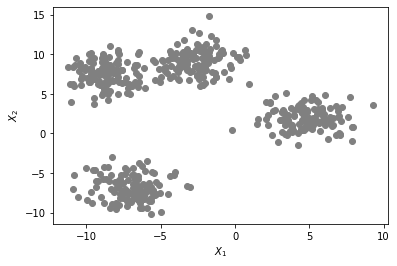

In [106]:
from scipy.spatial.distance import euclidean
from sklearn.datasets import make_blobs
import matplotlib.pylab as plt

colors = ['olivedrab', 'purple', 'cadetblue', 'sandybrown']

features, clusters = make_blobs(n_samples = 500,
                  n_features = 2, 
                  centers = 4,
                  cluster_std = 1.5,
                  shuffle = True,
                  random_state = 42)

plt.scatter(features[:, 0], features[:, 1], color = 'gray')
plt.xlabel(r'$X_1$')
plt.ylabel(r'$X_2$')
plt.show()

You can already guess the clusters just by looking. Assume, you choose to divide the data into four clusters. If we follow the k-means clustering algorithm a little bit, we would initialize four centroids by random guessing. Our first random guesses are illustrated by the colored crosses in the figure below.

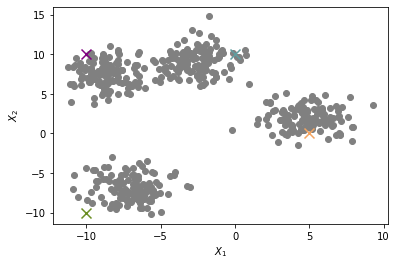

In [107]:
cluster_size = 4

centroids = np.array([[-10, -10], [-10, 10], [0, 10], [5, 0]])

plt.scatter(features[:, 0], features[:, 1], color = 'gray')
for i in range(cluster_size):
    plt.scatter(centroids[i, 0], centroids[i, 1], c = colors[i], marker = 'x', s = 100)
    
plt.xlabel(r'$X_1$')
plt.ylabel(r'$X_2$')
plt.show()

On purpose, I have chosen not the most representative centroids in the beginning. Once, given the centroids, we assert each observation to the cluster with the smallest euclidean distance to the centroid. Cluster assertion is now highlighted by different colors in the figure below.

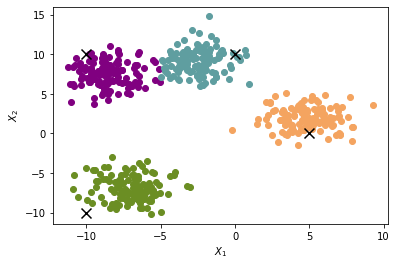

In [108]:
k = []
for f in features:
    k.append(np.argmin([euclidean(f, c) for c in centroids]))

for cluster in np.unique(k):
    idx = np.array(k) == cluster
    plt.scatter(features[idx, 0], features[idx, 1], color = colors[cluster])
    plt.scatter(centroids[cluster, 0], centroids[cluster, 1], color = 'black', marker = 'x', s = 100)

plt.xlabel(r'$X_1$')
plt.ylabel(r'$X_2$')
plt.show()

In the next step, we determine new centroids by averaging observations per cluster. The idea behind this step is to find the best representative for each cluster. You can compare the new representatives in the figure below with the initial guess. You hopefully agree, that just after one iteration, the new centroids seem to be a better fit. 

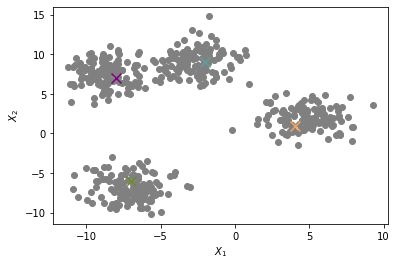

In [109]:
for i in range(len(centroids)):
    idx = np.array(k) == i 
    centroids[i] =  np.mean(features[idx], axis = 0)

plt.scatter(features[:, 0], features[:, 1], color = 'gray')
for i in range(cluster_size):
    plt.scatter(centroids[i, 0], centroids[i, 1], c = colors[i], marker = 'x', s = 100)
plt.xlabel(r'$X_1$')
plt.ylabel(r'$X_2$')
plt.show()

With better suited centroids, cluster assertion seems to improve.

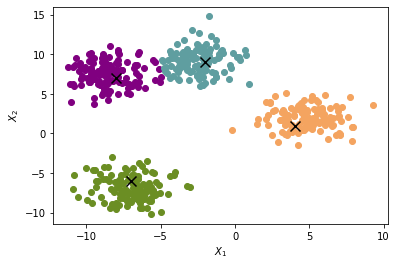

In [112]:
k = []
for f in features:
    k.append(np.argmin([euclidean(f, c) for c in centroids]))

for cluster in np.unique(k):
    idx = np.array(k) == cluster
    plt.scatter(features[idx, 0], features[idx, 1], color = colors[cluster])
    plt.scatter(centroids[cluster, 0], centroids[cluster, 1], color = 'black', marker = 'x', s = 100)

plt.xlabel(r'$X_1$')
plt.ylabel(r'$X_2$')
plt.show()

This example should just give you an impression, how k-means clustering works. In practice, we can use the sklearn k-means algorithm. Take a look at the example below:

Centroids are: 
[[-7.06163376 -6.91663151]
 [-8.64343131  7.55417397]
 [ 4.76279743  1.89919856]
 [-2.65633217  9.08649366]]

Estimated labels for the first five observations are: 
[1 0 2 3 0]
...
Visualized clusters are: 


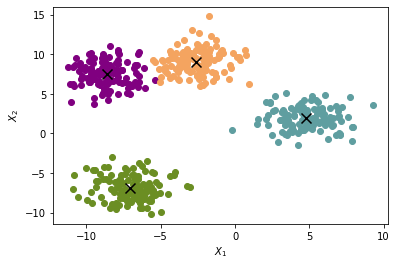

In [182]:
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
from sklearn.datasets import make_blobs

#define a color for each cluster
colors = ['olivedrab', 'purple', 'cadetblue', 'sandybrown']

#simulate some data
features, clusters = make_blobs(n_samples = 500,
                  n_features = 2, 
                  centers = 4,
                  cluster_std = 1.5,
                  shuffle = True,
                  random_state = 42)

#define the algorithm wit four clusters
k_means = KMeans(n_clusters = 4)

#fit the model, this means cluster assertion is estimated
k_means.fit(features)

#estimated cluster centroids are given by
print('Centroids are: ')
print(k_means.cluster_centers_)
print('')

#estimated labels for fitted data are given by
print('Estimated labels for the first five observations are: ')
print(k_means.labels_[:5])
print('...')

#labels for new observations can be derived by using the predict method

print('Visualized clusters are: ')
#visualize clustering
for cluster in np.unique(k_means.labels_):
    idx = k_means.labels_ == cluster
    plt.scatter(features[idx, 0], features[idx, 1], color = colors[cluster])
    plt.scatter(k_means.cluster_centers_[cluster, 0], k_means.cluster_centers_[cluster, 1],
                color = 'black', marker = 'x', s = 100)

plt.xlabel(r'$X_1$')
plt.ylabel(r'$X_2$')
plt.show()

## Assess clustering quality

As long as we stay in two or three dimensional space, visualizing cluster assertion is probably one of the best methods to get an impression how well clustering works. However, for higher dimensions, we either need to reduce dimensionality with appropriate reduction techniques (see the next section) upfront or we can use numerical quantifications which indicated the overall quality of cluster separation. Regarding the latter, we may include the **silhouette score** $S(\boldsymbol{x_i}) \in \left[-1, 1\right]$. What is does, is to compare average dissimilarity from an observation $i$ to the members in its own cluster in comparison to the members in the neighboring cluster.

For an observation $i$, we derive average within cluster dissimilarity by:

$$
a(i) = \frac{1}{|\lbrace j: j \in C_k \rbrace|} \sum_{j \in C_k, i \neq j} d(\boldsymbol{x}_i, \boldsymbol{x}_j)
$$

where $|\lbrace j: j \in C_k \rbrace|$ is the number of cluster members other than $i$. In the next step, average dissimilarity to other clusters, i.e., to members in other clusters is derived. This is conducted for each cluster, separately, and the cluster with the smallest average dissimilarity is used.

$$
b(i) = \min_\limits{l} \frac{1}{|\lbrace j: j \in C_l \rbrace|} \sum_{j \in C_l, i \neq j} d(\boldsymbol{x}_i, \boldsymbol{x}_j)
$$

The silhouette score for observation $i$ is now defined as:

$$
S(\boldsymbol{x_i}) = \frac{b(i) - a(i)}{\max \lbrace a(i), b(i) \rbrace}
$$

A value close to $1$ speaks for a very distinct separation of observation $i$ to the remaining clusters, while a value close to $-1$ indicates the opposite as observation $i$ is on average even closer to members from another cluster. 

In order to get an overview over all observations, we may average silhouette scores:

$$
\bar{S}(\boldsymbol{x_i}) = \sum_i S(\boldsymbol{x_i})
$$

We can use $\bar{S}(\boldsymbol{x_i})$ as a direct cluster quality measure and, for instance, choose the number of clusters according to the highest value for $\bar{S}(\boldsymbol{x_i})$. For our example, this could be achieved with the following code: 

In [202]:
from sklearn.metrics import silhouette_score

#define a range of clusters you want to take into account
n_k = 10
clusters = list(range(2, n_k + 1))


#empty list for avg. silhouette scores
avg_silhouette = []

for c in clusters:
    #given a number of clusters estimate them with k-means
    k_means = KMeans(n_clusters = c)
    k_means.fit(features)

    #derive avg. silhouette scores
    avg_silhouette.append(silhouette_score(features, k_means.labels_))
    

for s in avg_silhouette:
    print(f'The avg. Silhouette score for {c} clusters equals: {s:.2f}')
print('')
print(f'The best cluster number according to the avg. Silhouette score is {clusters[np.argmax(avg_silhouette)]}')

The avg. Silhouette score for 10 clusters equals: 0.57
The avg. Silhouette score for 10 clusters equals: 0.71
The avg. Silhouette score for 10 clusters equals: 0.69
The avg. Silhouette score for 10 clusters equals: 0.61
The avg. Silhouette score for 10 clusters equals: 0.50
The avg. Silhouette score for 10 clusters equals: 0.40
The avg. Silhouette score for 10 clusters equals: 0.34
The avg. Silhouette score for 10 clusters equals: 0.35
The avg. Silhouette score for 10 clusters equals: 0.36

The best cluster number according to the avg. Silhouette score is 3


Furthermore, a more detailed analysis for clustering quality may be given by the following figures. The code to generate the figures is hidden below. In each figure, from left to right for each cluster, the Silhouette score for each observation is plotted. This can reveal certain imbalances within clusters regarding their overall Silhouette scores. For this example, the figures confirm what is already provided by the average Silhouette score, that is, choosing three or four clusters might lead to the most distinct division of the data set.

In [199]:
from sklearn.metrics import silhouette_samples, silhouette_score

#define a function which plots silhouette scores for a given k-means clustering model
def plot_silhouettes(features, k_means):
    X = features
    labels = k_means.labels_

    n_clusters = len(np.unique(labels))


    fig, ax = plt.subplots(1, 1, figsize = (8, 6))

    x_split = 10

    ax.set_xlim([0, len(X) + (n_clusters + 1) * x_split])
    ax.set_ylim([np.min(silhouette_samples(X, labels)) - 0.1, 1])

    x_lower = x_split

    sample_silhouette_scores = silhouette_samples(X, labels)

    for i in range(n_clusters):

        ith_cluster_silhouette_scores = sample_silhouette_scores[labels == i]
        ith_cluster_silhouette_scores.sort()

        ith_size = ith_cluster_silhouette_scores.shape[0]

        x_upper = x_lower + ith_size

        ax.fill_between(np.arange(x_lower, x_upper), 0, 
                        ith_cluster_silhouette_scores)

        x_lower = x_upper + x_split

    ax.set_xlabel('Observations')
    ax.set_ylabel('Silhouette score')
    ax.set_title(f'Avg. Silhouette score: {silhouette_score(X, labels):.2f}')
    plt.show()

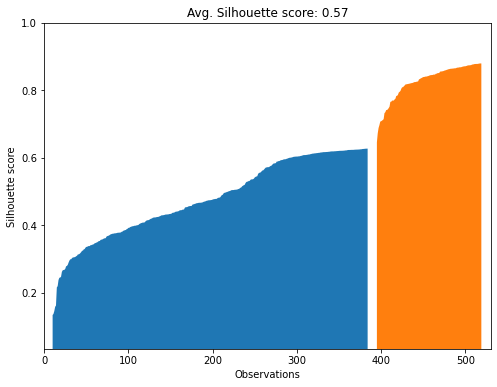

In [197]:
k_means = KMeans(n_clusters = 2)
k_means.fit(features)

plot_silhouettes(features, k_means)

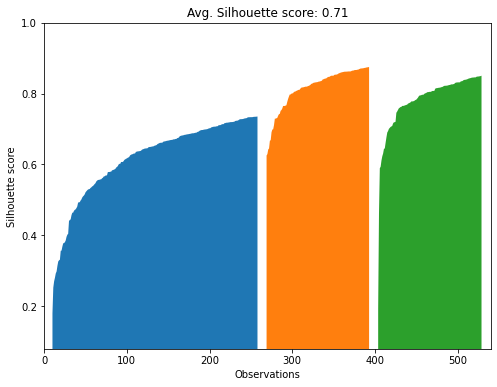

In [200]:
k_means = KMeans(n_clusters = 3)
k_means.fit(features)

plot_silhouettes(features, k_means)

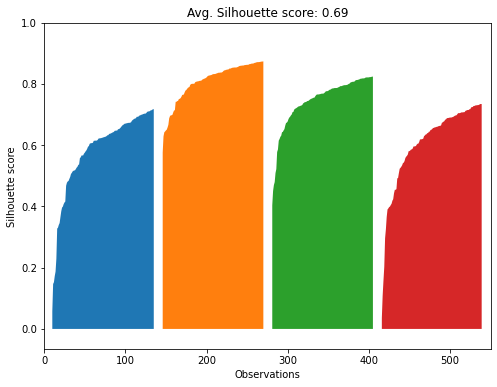

In [201]:
k_means = KMeans(n_clusters = 4)
k_means.fit(features)

plot_silhouettes(features, k_means)